##Create some Data using make_blobs

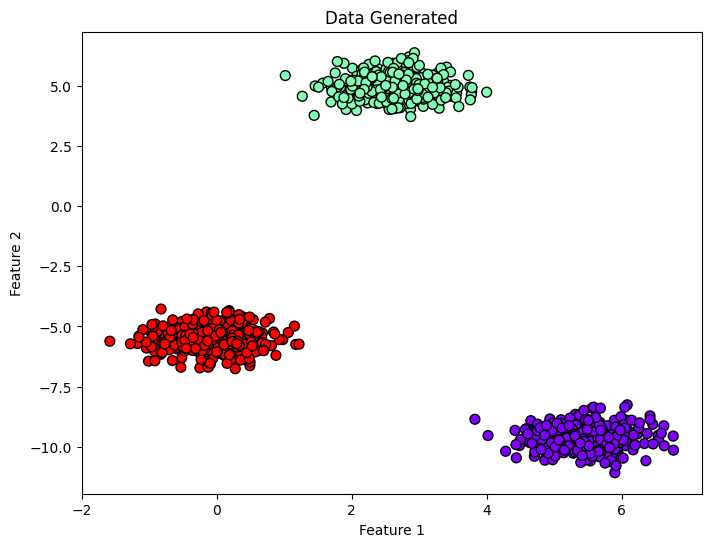

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generating Data according to "https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html"
n_samples = 1000
n_features = 2
centers = 3
cluster_std = 0.5
random_state = 10

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers,
                  cluster_std=cluster_std, shuffle=True, random_state=random_state)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', marker='o', edgecolor='k', s=50)
plt.title("Data Generated")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

##Using PCA

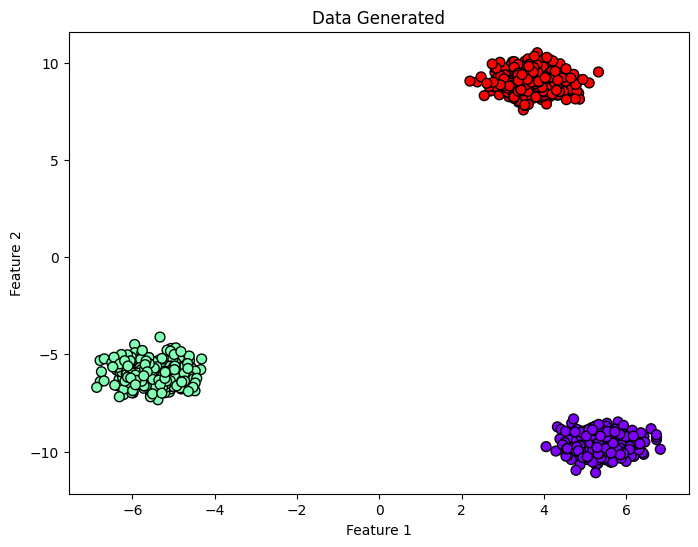

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Generating Data according to "https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html"
n_samples = 1000
n_features = 5
centers = 3
cluster_std = 0.5
random_state = 10

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers,
                  cluster_std=cluster_std, shuffle=True, random_state=random_state)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', marker='o', edgecolor='k', s=50)
plt.title("Data Generated")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

##Creating Data, at least three desity base clusters, that kMeans can not work correctly, but DBSCAN works properly

Average NMI over 10 runs: 0.04877439373871806


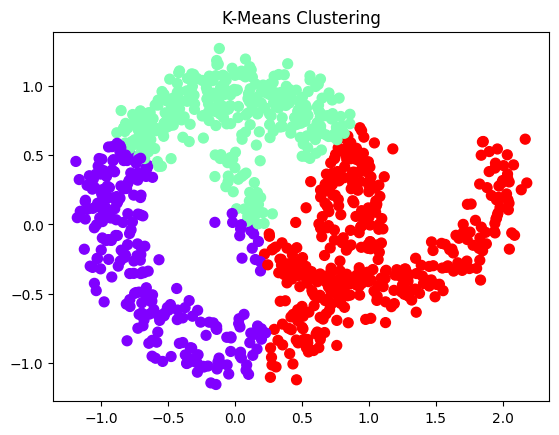

In [9]:
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score as nmi
import numpy as np


""" According to "https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_moons.html
and https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_circles.html
"""
n_samples = 500
noise = 0.1
X, y_moon = make_moons(n_samples=n_samples, noise=noise, random_state=10)

X_circular, y_circular = make_circles(n_samples=n_samples, noise=noise, random_state=10)

X_combined = np.vstack([X, X_circular])
y_combined = np.hstack([y_moon, y_circular])

n_runs = 10
n_clusters = 3
nmi_scores = []

for _ in range(n_runs):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(X_combined)
    nmi_scores.append(nmi(y_combined, y_pred))

avg_nmi = np.mean(nmi_scores)
print(f"Average NMI over 10 runs: {avg_nmi}")

plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_pred, cmap='rainbow', s=50)
plt.title('K-Means Clustering')
plt.show()

##DBSCAN

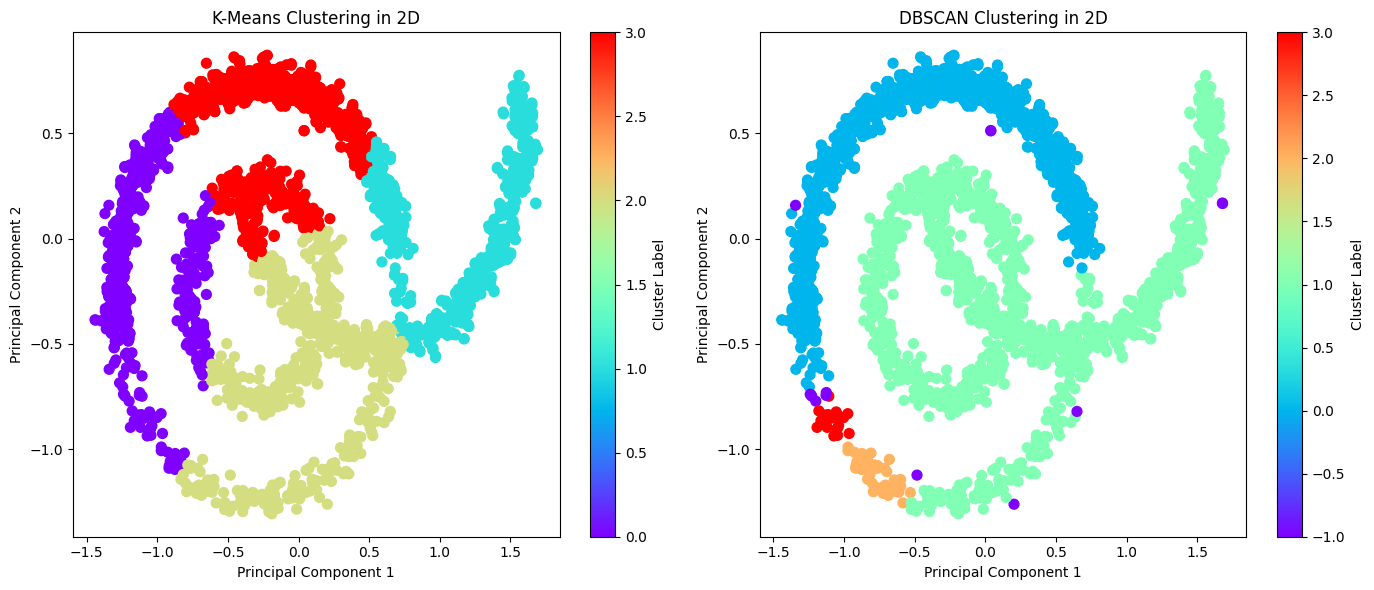

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.decomposition import PCA

n_samples = 1000
noise = 0.05
X_moon1, y_moon1 = make_moons(n_samples=n_samples, noise=noise, random_state=40)
X_moon2, y_moon2 = make_moons(n_samples=n_samples, noise=noise, random_state=40)
X_circular, y_circular = make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=50)

X_combined = np.vstack([X_moon1, X_moon2, X_circular])
y_combined = np.hstack([y_moon1, y_moon2, y_circular])

random_features = np.random.rand(3 * n_samples, 2)
X_combined = np.hstack([X_combined, random_features])


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_combined)

# KMeans clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
y_pred_kmeans = kmeans.fit_predict(X_reduced)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.09, min_samples=10)
y_pred_dbscan = dbscan.fit_predict(X_reduced)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# KMeans plot
sc1 = ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_kmeans, cmap='rainbow', s=50)
ax1.set_title('K-Means Clustering in 2D')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
plt.colorbar(sc1, ax=ax1, label='Cluster Label')

# DBSCAN plot
sc2 = ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_dbscan, cmap='rainbow', s=50)
ax2.set_title('DBSCAN Clustering in 2D')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
plt.colorbar(sc2, ax=ax2, label='Cluster Label')

plt.tight_layout()
plt.show()

## Now another plan that HDBSCAN works but kMeans and DBSCAN do not work properly

In [12]:
pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 41.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


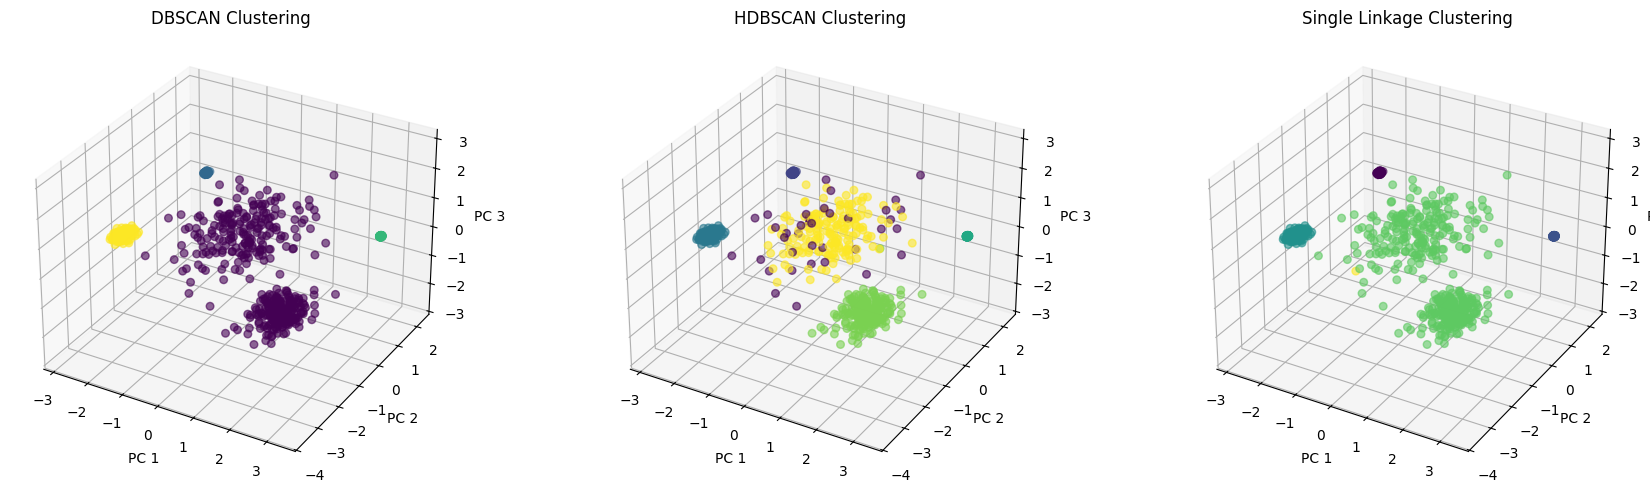

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import hdbscan
from scipy.cluster.hierarchy import linkage, fcluster
from mpl_toolkits.mplot3d import Axes3D

n_samples = 1000
n_features = 10
centers = 5
cluster_std = [0.1, 0.5, 1.5, 0.05, 3.0]
random_state = 42

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers,
                       cluster_std=cluster_std, shuffle=True, random_state=random_state)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=10)
y_pred_dbscan = dbscan.fit_predict(X_scaled)

hdb = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=50)
y_pred_hdbscan = hdb.fit_predict(X_scaled)

Z = linkage(X_scaled, method='single')
y_pred_single_linkage = fcluster(Z, t=5, criterion='maxclust')

fig = plt.figure(figsize=(18, 5))

# DBSCAN
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_pred_dbscan, s=30, alpha=0.6)
ax1.set_title('DBSCAN Clustering ')
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')
ax1.set_zlabel('PC 3')

# HDBSCAN
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_pred_hdbscan, s=30, alpha=0.6)
ax2.set_title('HDBSCAN Clustering')
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_zlabel('PC 3')

# Single Linkage
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_pred_single_linkage, s=30, alpha=0.6)
ax3.set_title('Single Linkage Clustering')
ax3.set_xlabel('PC 1')
ax3.set_ylabel('PC 2')
ax3.set_zlabel('PC 3')

plt.tight_layout()
plt.show()


#Single Linkage Clustering could not find Clusters effectively. It seems it has some problems against noises and also if it finds two points that are close enough, it merged them and it can be lead to merging two different clusters! for example in the result of above, HDBSCAN could separate green and yellow clusters but Single Linkage merged them!